In [2]:
###' ################################################################################
###'
###' IMPORT LIBRARIES
###'
###'

import numpy as np
import pandas as pd
from pathlib import Path

import ast
import umap.umap_ as umap
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.cluster import KMeans
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

## 0. Clustering Settings

In [3]:
# Load dataset

data_dir = Path(r"C:\Users\Hyemi\Python\TopicModeling\Data")
data_dir.mkdir(parents=True, exist_ok=True) 

embedding_files = [
    "articles_embedding_1_full.csv",
    "articles_embedding_2_full.csv",
    "articles_embedding_3_full.csv",
    "articles_embedding_4_full.csv"
]

embedding_file_paths = [data_dir / file for file in embedding_files]


embedding_dfs = []
for file_path in embedding_file_paths:
    if file_path.exists():  # Check if the file exists before reading
        embedding_dfs.append(pd.read_csv(file_path))

df1a = embedding_dfs[0]
df2a = embedding_dfs[1]
df3a = embedding_dfs[2]
df4a = embedding_dfs[3]

df1 = df1a.loc[:, ~df1a.columns.str.contains("Cluster", case=False)]
df2 = df2a.loc[:, ~df2a.columns.str.contains("Cluster", case=False)]
df3 = df3a.loc[:, ~df3a.columns.str.contains("Cluster", case=False)]
df4 = df4a.loc[:, ~df4a.columns.str.contains("Cluster", case=False)]


# Function to extract embeddings and normalize them
def normalize_embeddings(df):
    embeddings = df["Embeddings"].apply(lambda x: np.array(ast.literal_eval(x)) if isinstance(x, str) else np.array(x))
    embeddings_matrix = np.vstack(embeddings.values)
    scaler = StandardScaler()
    embeddings_scaled = scaler.fit_transform(embeddings_matrix)
    df["Embeddings_S"] = list(map(lambda x: x.tolist(), embeddings_scaled))
    
    return embeddings_scaled

# Normalize embeddings without modifying the "Embeddings" column
embeddings_scaled1 = normalize_embeddings(df1)
embeddings_scaled2 = normalize_embeddings(df2)
embeddings_scaled3 = normalize_embeddings(df3)
embeddings_scaled4 = normalize_embeddings(df4)

# UMAP Dimensionality Reduction to 3D
umap_3d = umap.UMAP(n_components=3, n_neighbors=30, min_dist=0.1, metric='cosine', random_state=42)

# Operate by group
embedding1_3d = umap_3d.fit_transform(embeddings_scaled1)
embedding2_3d = umap_3d.fit_transform(embeddings_scaled2)
embedding3_3d = umap_3d.fit_transform(embeddings_scaled3)
embedding4_3d = umap_3d.fit_transform(embeddings_scaled4)

In [7]:
###' ################################################################################
###'
###' Elbow Function
###'
###'

# Function to calculate the Within-Cluster Sum of Squares (WCSS) for different cluster sizes
def plot_elbow_method(embeddings_matrix, max_clusters=9):
    wcss = []  # List to store WCSS for each number of clusters
    
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=30)
        kmeans.fit(embeddings_matrix)
        wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest centroid
    
    # Plot Elbow Graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='-', color='b')
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
    plt.title("Elbow Method for Optimal k")
    plt.xticks(range(1, max_clusters + 1))
    plt.grid()
    plt.show()

## Group1. Spectral Clustering

C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Hyemi\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

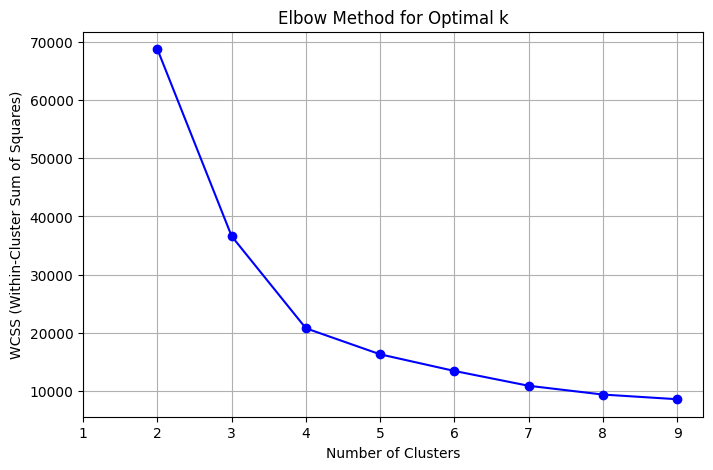

In [8]:
plot_elbow_method(embedding1_3d)

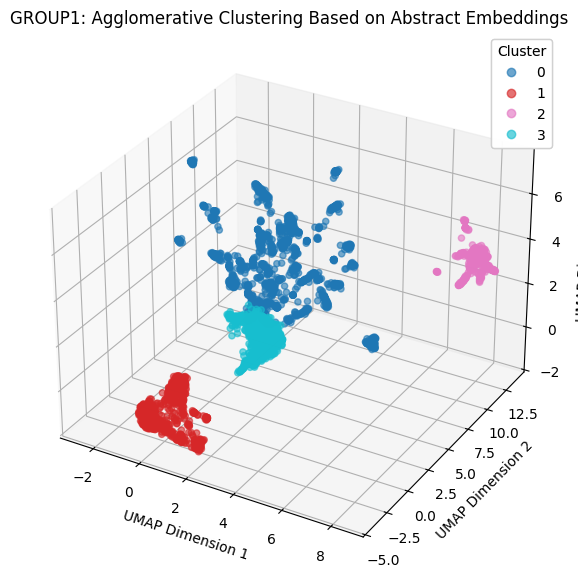

In [10]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering

num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1 = agg_clustering.fit_predict(embedding1_3d)

df1["Cluster"] = labels_1

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding1_3d[:, 1], embedding1_3d[:, 0], embedding1_3d[:, 2], 
    c=labels_1, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("GROUP1: Agglomerative Clustering Based on Abstract Embeddings")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group2. Spectral Clustering

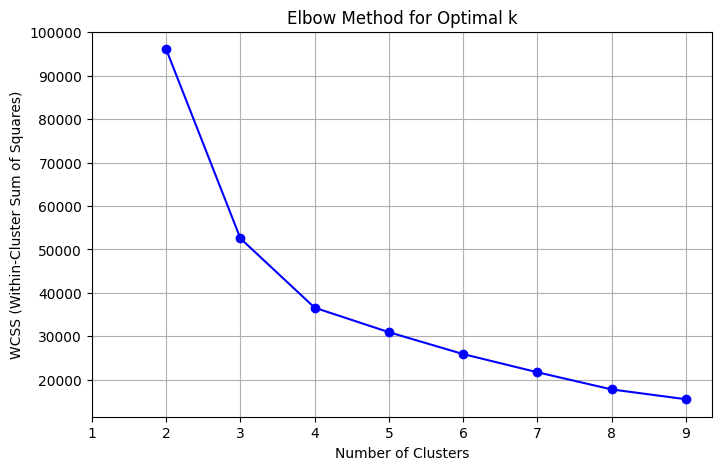

In [11]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding2_3d)

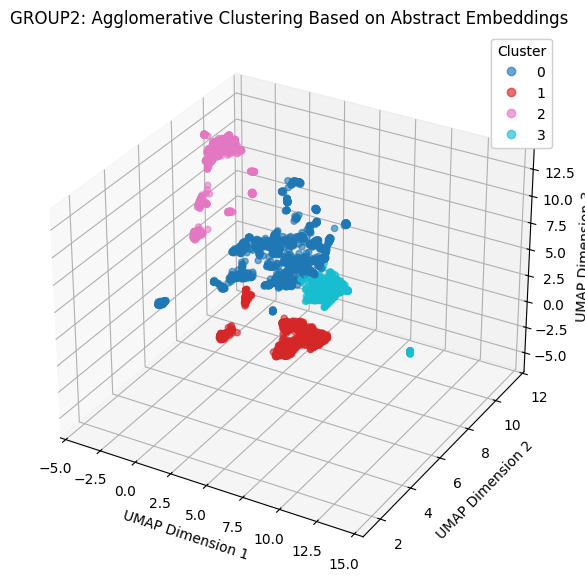

In [13]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering
num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_2 = agg_clustering.fit_predict(embedding2_3d)

df2["Cluster"] = labels_1_2

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap("tab10")

# Scatter plot
scatter = ax.scatter(
    embedding2_3d[:, 0], embedding2_3d[:, 2], embedding2_3d[:, 1], 
    c=labels_1_2, cmap=cmap, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP2: Agglomerative Clustering Based on Abstract Embeddings")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group3. Spectral Clustering

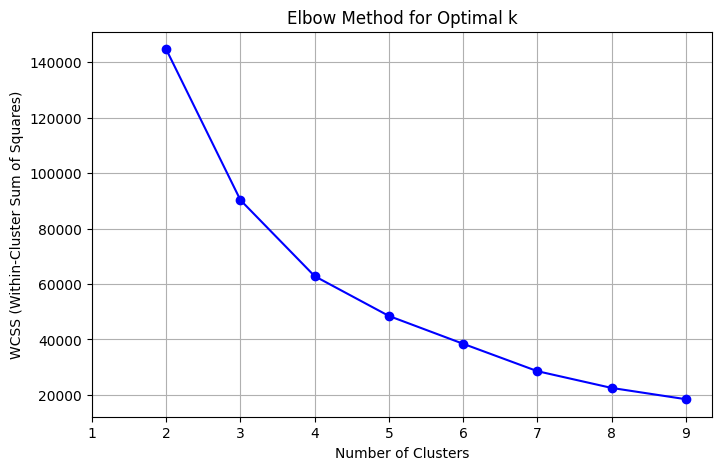

In [14]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding3_3d)

C:\Users\Hyemi\AppData\Local\Temp\ipykernel_18584\3060275733.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Cluster"] = labels_1_3


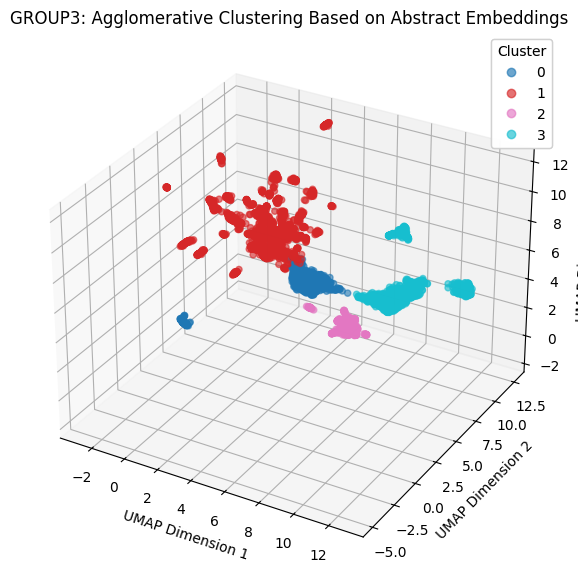

In [16]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering

num_clusters = 4
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_3 = agg_clustering.fit_predict(embedding3_3d)

df3["Cluster"] = labels_1_3

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding3_3d[:, 1], embedding3_3d[:, 0], embedding3_3d[:, 2], 
    c=labels_1_3, cmap="tab10", alpha=0.6
)

# Labels and Title
ax.set_title("GROUP3: Agglomerative Clustering Based on Abstract Embeddings")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

## Group4. Spectral Clustering

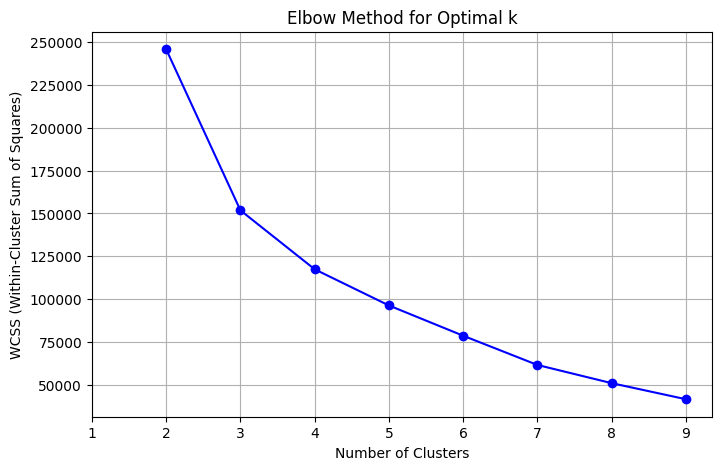

In [17]:
# Run the Elbow Method function to determine the optimal number of clusters
plot_elbow_method(embedding4_3d)

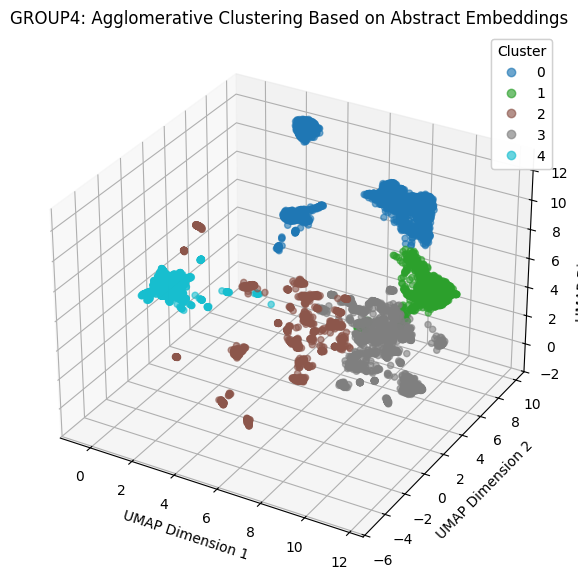

In [18]:
###' ################################################################################
###'
###' Special Trial2
###' : AgglomerativeClustering
###'
###'

from sklearn.cluster import AgglomerativeClustering

num_clusters = 5
agg_clustering = AgglomerativeClustering(n_clusters=num_clusters)
labels_1_4 = agg_clustering.fit_predict(embedding4_3d)

df4["Cluster"] = labels_1_4

# Define custom colors for each cluster
cmap = plt.get_cmap("tab10")

# Create 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    embedding4_3d[:, 2], embedding4_3d[:, 1], embedding4_3d[:, 0], 
    c=labels_1_4, cmap=cmap, alpha=0.6
)

# Labels and Title
ax.set_title("GROUP4: Agglomerative Clustering Based on Abstract Embeddings")
ax.set_xlabel("UMAP Dimension 1")
ax.set_ylabel("UMAP Dimension 2")
ax.set_zlabel("UMAP Dimension 3")

# Add legend
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

# Show plot
plt.show()

In [22]:
df4

,Year,Abstract,Abstract_tokens,Abstract_join,Year_Group,Embeddings,Embeddings_S,Cluster
0,2022,IntroductionPersonality disorders can be chara...,"['introductionpersonality', 'disorder', 'chara...",introductionpersonality disorder characterize ...,4,"[1.3603360652923584, 1.5754835605621338, 0.828...","[0.4064845308640249, 1.0627351518602395, -1.09...",2
1,2022,This study investigated the independent and in...,"['investigate', 'independent', 'interactive', ...",investigate independent interactive supportive...,4,"[1.1426397562026978, 1.384385347366333, 0.6786...","[-0.07655634926556183, 0.21327432183413192, -1...",3
2,2022,BackgroundThe rapid development of China’s cul...,"['backgroundthe', 'rapid', 'development', 'chi...",backgroundthe rapid development china cultural...,4,"[0.7582343220710754, 1.3325852155685425, 1.134...","[-0.9295039256668636, -0.016985198736727186, 0...",2
3,2022,Under the framework of Directed Motivational C...,"['framework', 'direct', 'motivational', 'curre...",framework direct motivational current explore ...,4,"[0.882818877696991, 1.046689510345459, 1.11875...","[-0.6530663799328653, -1.2878354018773837, 0.6...",3
4,2022,"“Hezhe” , “ganqing” , and “nao le bantian” are...","['hezhe', 'ganqe', 'nao', 'le', 'bantian', 'co...",hezhe ganqe nao le bantian common mood express...,4,"[1.1940776109695435, 1.3073123693466187, 1.009...","[0.03757781654761078, -0.12932687148068425, -0...",3
...,...,...,...,...,...,...,...,...
12170,2024,IntroductionPeople are more likely to believe ...,"['introductionpeople', 'likely', 'believe', 'r...",introductionpeople likely believe repeat infor...,4,"[0.37915757298469543, 0.9022796154022217, 0.82...","[-1.7706278164716993, -1.9297595055673333, -1....",4
12171,2024,"In the field of youth mentoring, mentor suppor...","['field', 'youth', 'mentor', 'mentor', 'suppor...",field youth mentor mentor support important sc...,4,"[1.230247139930725, 1.718061089515686, 0.89603...","[0.11783347718026754, 1.6965141080447301, -0.6...",3
12172,2024,Studies have indicated that the media plays a ...,"['media', 'play', 'role', 'development', 'body...",media play role development body dissatisfacti...,4,"[1.3056696653366089, 1.605039358139038, 0.6982...","[0.2851866271073489, 1.1941151994383736, -1.86...",1
12173,2024,IntroductionCognitive functioning is central t...,"['introductioncognitive', 'functioning', 'cent...",introductioncognitive functioning central abil...,4,"[1.3674397468566895, 1.3004164695739746, 0.898...","[0.422246711717452, -0.15998020228208276, -0.6...",0


In [23]:
###' ################################################################################
###'
###' Saving
###'
###'

file_path1 = data_dir / "articles_4_clustering1.csv"
df1.to_csv(file_path1, index=False)

file_path2 = data_dir / "articles_4_clustering2.csv"
df2.to_csv(file_path2, index=False)

file_path3 = data_dir / "articles_4_clustering3.csv"
df3.to_csv(file_path3, index=False)

file_path4 = data_dir / "articles_4_clustering4.csv"
df4.to_csv(file_path4, index=False)